# GRADIENT BOOSTING REGRESSOR
Columnas usadas: carat, cut_num, color_num, clarity_num, x,y,z, depth, table
Sin escalar

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
diamonds_train = pd.read_csv('data/diamonds_train.csv')
diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [53]:
diamonds_predict = pd.read_csv('data/diamonds_test.csv')

## GETTING RID OF 0 IN xyz

### TRAIN

In [54]:
diamonds_train = diamonds_train[(diamonds_train['x'] != 0) & (diamonds_train['y'] != 0) & (diamonds_train['z'] != 0)]
diamonds_train.shape

(40439, 10)

### TEST

Celda no ejecutada porque al eliminar rows en el csv de test, da fallo la submission

diamonds_predict = diamonds_predict[(diamonds_predict['x'] != 0) & (diamonds_predict['y'] != 0) & (diamonds_predict['z'] != 0)]
diamonds_predict.info()

## GET RID OF OUTLIERS

Tried with 75-25, not a good idea shape=(6465, 10), we gonna try with some less outliers

In [55]:
# Hay un diamante con un depth de 79
diamonds_train = diamonds_train[(diamonds_train["depth"]<71) & (diamonds_train["depth"]>54)]

# Hay 3 mayores de 75 y dos menores de 45
diamonds_train = diamonds_train[(diamonds_train["table"]<70) & (diamonds_train["table"]>52)]

diamonds_train = diamonds_train[(diamonds_train["x"]<10)] 
#solo dropeamos las que sean x<10 porque coincide con 'y' en sus dos únicos valores por encima de 10 y no dropeamos nada de z porque hay bastantes valores en torno a 6

In [56]:
diamonds_train.shape

(40345, 10)

In [57]:
import numpy as np
diamonds_train["carat_cat"] = np.ceil(diamonds_train["carat"] / 0.4)
diamonds_train["carat_cat"].where(diamonds_train["carat_cat"] < 5, 5.0, inplace = True)

In [58]:
diamonds_train['carat_cat']

0        4.0
1        1.0
2        2.0
3        2.0
4        3.0
        ... 
40450    4.0
40451    5.0
40452    3.0
40453    1.0
40454    4.0
Name: carat_cat, Length: 40345, dtype: float64

# ENCODING CATEGORIES

## TRAIN

In [59]:
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'table', 'depth', 'x', 'y', 'z']
predict_num_feat = ['id','carat', 'table', 'depth', 'x', 'y', 'z']
target = 'price'

In [60]:
for cat in cat_features:
    diamonds_train[cat_features] = diamonds_train[cat_features].astype('category')
    diamonds_predict[cat_features] = diamonds_predict[cat_features].astype('category')

In [64]:
cat_df_train = pd.get_dummies(diamonds_train[cat_features])
num_df_train = diamonds_train[num_features]

TypeError: cannot concatenate object of type '<class 'scipy.sparse.csr.csr_matrix'>'; only Series and DataFrame objs are valid

## TEST CSV (nuestro diamonds_predict)

In [42]:
cat_df_predict = pd.get_dummies(diamonds_predict[cat_features])
num_df_predict = diamonds_predict[predict_num_feat]

In [43]:
predict_df = pd.concat([cat_df_predict, num_df_predict], axis=1)

# FEATURE ENGINERING

## Price/Carat
Útil para el análisis, no le encuentro uso para ML

### Train

In [13]:
#diamonds_train['price/carat'] = (diamonds_train['price']/diamonds_train['carat']).round(2)

## HEATMAP

Depth & cut no están muy relacionados con el precio

<AxesSubplot:>

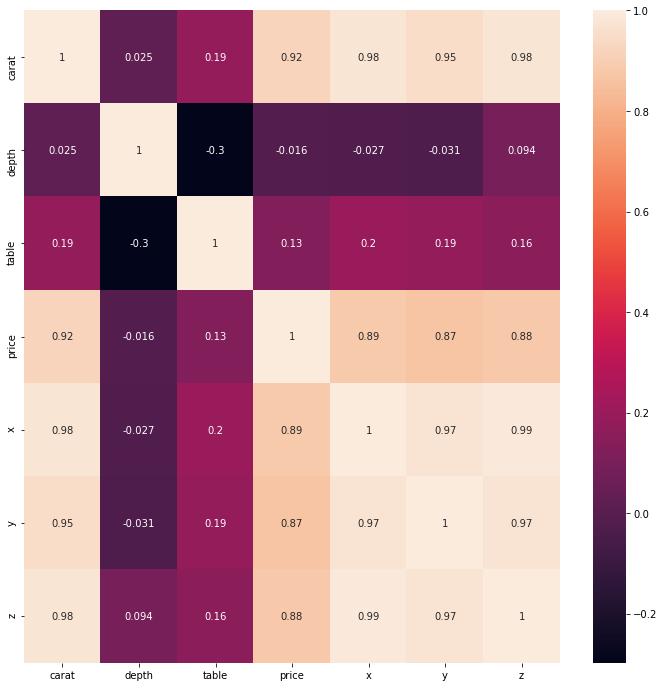

In [14]:
plt.figure(figsize=(12,12))
corr = diamonds_train.corr()
sns.heatmap(data=corr, annot=True, cbar=True)

# ESCALAR

In [44]:
#cat_features = ['cut', 'color', 'clarity']
feat = cat_df_train.columns.tolist() + num_df_train.columns.tolist()

#predict_feat = ['id','carat', 'table', 'depth', 'x', 'y', 'z', 'cut_num', 'color_num', 'clarity_num']
target = 'price'

### TRAIN

In [16]:
#from sklearn.preprocessing import StandardScaler

In [17]:
#scaler = StandardScaler()

In [18]:
#X = scaler.fit_transform(diamonds_train[features])
#y = diamonds_train[target]

### TEST CSV (PREDICT)

# TRAIN-TEST-SPLIT

In [45]:
from sklearn.model_selection import train_test_split 

In [46]:
X = train_df[feat]
y = train_df[target]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

### TEST

# MODELS

In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

## 1. RANDOM FOREST

In [23]:
rfr_model = RandomForestRegressor()

In [24]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
y_pred = rfr_model.predict(X_test)

In [26]:
cv_score = cross_val_score(estimator=rfr_model, X=X_train, y=y_train, cv=5,verbose = 1)
print('Cross validation score : %.4f' % rfr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))
r2 = rfr_model.score(X_test,y_pred)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test,y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test,y_pred))**0.5
print("rmse: %f" %(rmse))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   55.3s finished


Cross validation score : 0.9805
[0.98094278 0.97908074 0.98022935 0.97713502 0.98026374]
mae: 277.181482
R2: 1.000000
mse: 311385.848555
rmse: 558.019577


In [ ]:
#crossval_score = cross_val_score(rfr_model, X_train, y_train, cv=10)
#print(cross_val_score)

## 2. DECISION TREE

In [27]:
dtr_model = DecisionTreeRegressor(random_state = 0) #rstate=0 porque los resultados son mejores que sin poner nada o poniendo 1
dtr_model.fit(X_train, y_train)
y_pred = dtr_model.predict(X_test)

In [28]:
cv_score = cross_val_score(estimator=dtr_model, X=X_train, y=y_train, cv=5,verbose = 1)
print('Cross validation score : %.2f' % dtr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))
r2 = dtr_model.score(X_test,y_pred)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test,y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test,y_pred))**0.5
print("rmse: %f" %(rmse))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross validation score : 0.96
[0.96400114 0.96230959 0.96394082 0.95812106 0.96297902]
mae: 373.080153
R2: 1.000000
mse: 594512.181546
rmse: 771.046160


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


## 3. GRADIENT BOOSTING

In [48]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=0, loss='ls',verbose = 1)
#max_depth 1, mal, 2, mal, 4 ok (553 rmse), 8 ok (542)

In [49]:
gbr_model.fit(X_train , y_train)
y_pred = gbr_model.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1    12993455.5283           18.39s
         2    10659444.8830           16.11s
         3     8766115.7787           14.60s
         4     7228871.4932           14.31s
         5     5972647.8268           13.51s
         6     4943273.7397           13.88s
         7     4106142.1537           13.41s
         8     3426824.9171           13.01s
         9     2861880.0934           12.66s
        10     2401781.4933           12.36s
        20      571764.3017           10.28s
        30      277774.5605            8.76s
        40      210934.7100            7.43s
        50      182418.8606            6.06s
        60      164114.1685            4.79s
        70      147606.1319            3.58s
        80      136174.4732            2.38s
        90      125231.1513            1.19s
       100      116174.6729            0.00s


In [50]:
cv_score = cross_val_score(estimator=gbr_model, X=X_train, y=y_train, cv=5,verbose = 1)
print('Cross validation score : %.2f' % gbr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test, y_pred)
print("mae: %f" %(mae))
r2 = gbr_model.score(X_test,y_pred)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test, y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("rmse: %f" %(rmse))

      Iter       Train Loss   Remaining Time 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


         1    12930396.6500           13.86s
         2    10607574.6453           13.01s
         3     8721961.2414           12.61s
         4     7190779.0034           11.73s
         5     5942719.7686           11.22s
         6     4925566.6223           11.04s
         7     4089871.6825           10.60s
         8     3407866.9407           10.34s
         9     2853140.0766           10.13s
        10     2394743.5745            9.80s
        20      567430.6305            7.85s
        30      271623.0218            6.67s
        40      202170.0287            6.14s
        50      171374.0790            4.95s
        60      151602.3926            3.89s
        70      133522.2505            3.01s
        80      122684.2578            2.09s
        90      112448.7246            1.04s
       100      105440.2535            0.00s
      Iter       Train Loss   Remaining Time 
         1    13014480.1480            8.40s
         2    10676931.3958            8.39s
         

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.2s finished


## LIGHT GBM

In [32]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [33]:
hgbr_model = HistGradientBoostingRegressor()

In [34]:
regressor.fit(X_train, y_train)
y_pred = hgbr_model.predict(X_test)

NameError: name 'regressor' is not defined

In [ ]:
cv_score = cross_val_score(estimator=hgbr_model, X=X_train, y=y_train, cv=5,verbose = 1)
print('Cross validation score : %.2f' % hgbr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test, y_pred)
print("mae: %f" %(mae))
r2 = hgbr_model.score(X_test,y_pred)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test, y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("rmse: %f" %(rmse))

# ERROR METRICS

### MAE

In [ ]:
mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))

### RMSE

In [ ]:
rmse = (mean_squared_error(Y_test,y_pred))**0.5
print("rmse: %f" %(rmse))

### R2

In [ ]:
Rsquare=regressor.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))

## PREDICTION

In [70]:
X_predict = diamonds_predict[features]
predictions = gbr_model.predict(X_predict)
diamonds_id = diamonds_predict['id']

# GENERAR DF

In [71]:
submission = pd.DataFrame({'id': diamonds_id, 'price': predictions})

In [72]:
submission.shape

(13485, 2)

In [1]:
submission.info()

NameError: name 'submission' is not defined

In [73]:
submission.to_csv('submission.csv', index=False)